# 자료 분할 후 모형 학습 및 평가

- 회귀모형 : 캘리포니아 집값 예측 자료
- 분류모형 : 붓꽃 데이터 자료

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 데이터 불러오기
california_housing = fetch_california_housing()

# 데이터를 판다스 데이터프레임으로 변환
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns = ['MedHouseVal'])

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# 선형회귀모형에서 자료 분할 후 학습 및 평가
- 변수선택과 벌점화 방법 포함

In [4]:
# 학습자료와 시험자료 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# 학습자료로 선형회귀모형 학습

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# 시험자료로 모형 평가(MSE,test error)

from sklearn.metrics import mean_squared_error
pred = lin_reg.predict(X_test)
mean_squared_error(y_test,pred)

0.49953803843393974

In [7]:
#학습자료에서의 모형 평가(MSE,training error)
pred = lin_reg.predict(X_train)
mean_squared_error(y_train,pred)

0.5310821769312208

In [8]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
# Lasso(L1 penalty)

lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train, y_train)
pred = lin_reg_lasso.predict(X_test)
mean_squared_error(y_test,pred)

0.9198273024386693

In [9]:
# Lasso CV(L1 penalty)

lin_reg_lasso_cv = LassoCV()
lin_reg_lasso_cv.fit(X_train, y_train)
pred = lin_reg_lasso_cv.predict(X_test)
mean_squared_error(y_test,pred)

C:\Users\Awesomemin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5196918050430323

In [10]:
lin_reg_lasso_cv.coef_

array([ 3.80126951e-01,  1.10461780e-02,  0.00000000e+00,  0.00000000e+00,
        1.21348865e-06, -3.18518140e-03, -3.37998264e-01, -3.37766142e-01])

In [11]:
# Ridge(L2 penalty)

lin_reg_ridge = Ridge()
lin_reg_ridge.fit(X_train, y_train)
pred = lin_reg_ridge.predict(X_test)
mean_squared_error(y_test,pred)

0.49953706483937554

In [12]:
# Ridge CV(L2 penalty)

lin_reg_ridge_cv = RidgeCV()
lin_reg_ridge_cv.fit(X_train, y_train)
pred = lin_reg_ridge_cv.predict(X_test)
mean_squared_error(y_test,pred)

0.4995327808483185

In [13]:
lin_reg_ridge_cv.coef_

array([[ 4.36093194e-01,  8.95374773e-03, -1.12097530e-01,
         6.24498506e-01, -6.61645117e-06, -3.43323844e-03,
        -4.23308443e-01, -4.36562377e-01]])

# 로지스틱 모형에서 자료 분할 후 학습 및 평가

In [14]:
import seaborn as sns
import numpy as np

iris = sns.load_dataset('iris')

y = iris['species']
y
# 특성과 라벨 분리
y = iris['species'].astype('category')
y = pd.get_dummies(y)
y.head()

y = np.array(y.loc[:,"setosa"], dtype = float) # y=1 denotes setosa
X = np.array(iris.iloc[:,0:4])


In [15]:
# 학습자료와 시험자료 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# 학습자료에서 로지스틱 모형 학습

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
# 시험자료로 모형 평가(test 오분류율)

pred = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[21,  0],
       [ 0,  9]], dtype=int64)

In [18]:
import sklearn.metrics as metrics

pred_prob = log_reg.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

1.0

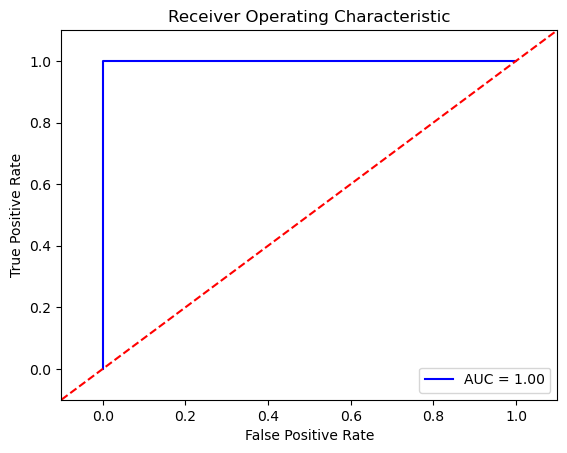

In [21]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1.1], [-0.1, 1.1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 다른 자료로 다시 해보기 : sonar data



In [27]:
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
column_names = [f"Attribute_{i}" for i in range(1, 61)] + ["Class"]
data = pd.read_csv(url, header=None, names=column_names)
data.columns

# 특성과 라벨 분리
y = data['Class'].astype('category')
y = pd.get_dummies(y)
print("head(y):", y.head())

y = np.array(y.drop(columns = ["R"]), dtype = float) # y=1 denotes Metal
y = y.flatten()
X = np.array(data.drop(columns=["Class"]))

print("X.shape, y.shape:", X.shape, y.shape)


head(y):    M  R
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1
X.shape, y.shape: (208, 60) (208,)


In [28]:
# 학습자료와 시험자료 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 학습자료에서 로지스틱 모형 학습

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 시험자료로 모형 평가(test 오분류율)

pred = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[11,  4],
       [ 4, 23]], dtype=int64)

In [29]:
import sklearn.metrics as metrics

pred_prob = log_reg.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8345679012345679

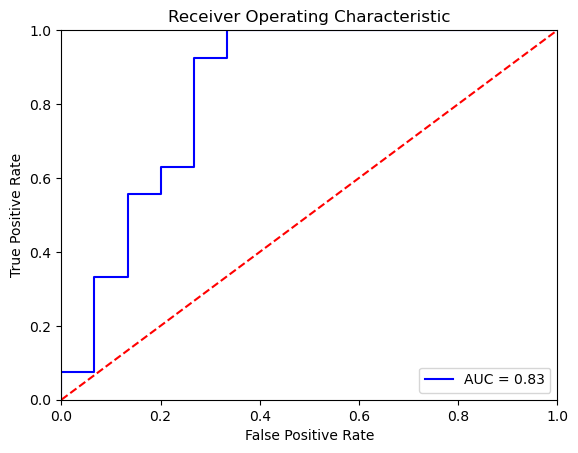

In [30]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
# 로지스틱 모형에 L1 penalty 붙여보기 (with cross-validation)

from sklearn.linear_model import LogisticRegressionCV
log_reg_l1 = LogisticRegressionCV(penalty='l1',solver='liblinear')
log_reg_l1.fit(X_train,y_train)
pred = log_reg_l1.predict(X_test)
confusion_matrix(y_test,pred)

array([[11,  4],
       [ 4, 23]], dtype=int64)

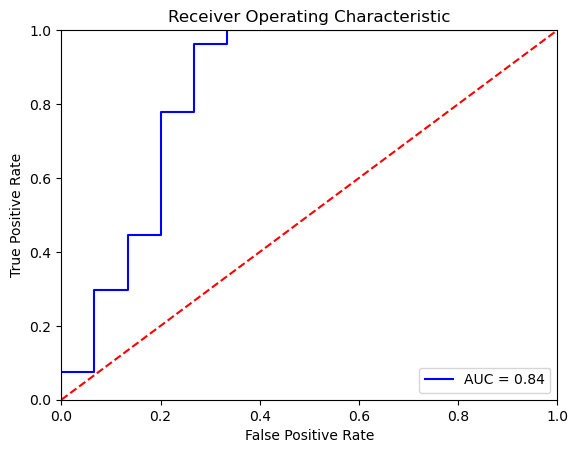

In [32]:
import sklearn.metrics as metrics

pred_prob = log_reg_l1.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
# 로지스틱 모형에 L2 penalty with CV

from sklearn.linear_model import LogisticRegression
log_reg_l2 = LogisticRegression(penalty='l2',solver='liblinear')
log_reg_l2.fit(X_train,y_train)
pred = log_reg_l2.predict(X_test)
confusion_matrix(y_test,pred)

array([[11,  4],
       [ 4, 23]], dtype=int64)

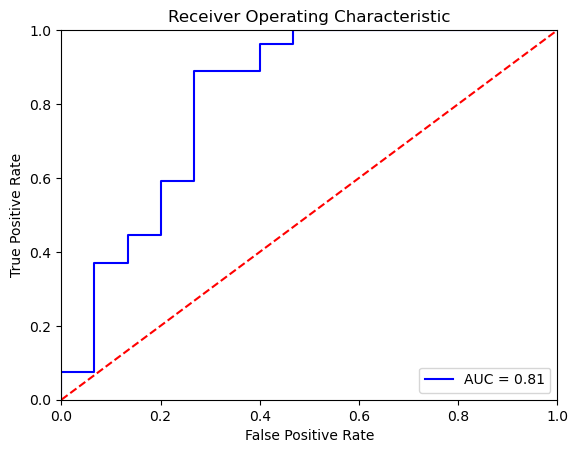

In [34]:
import sklearn.metrics as metrics

pred_prob = log_reg_l2.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 다양한 분류모형의 학습 및 평가: sonar data

- 분류나무
- Random Forest
- SVM
- 부스팅(Gradient boosting)
- 신경망 모형

#분류나무

In [35]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()

model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
pred = model_tree.predict(X_test)
confusion_matrix(y_test,pred)

array([[ 6,  9],
       [ 7, 20]], dtype=int64)

In [37]:
pred_prob = model_tree.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.5703703703703704

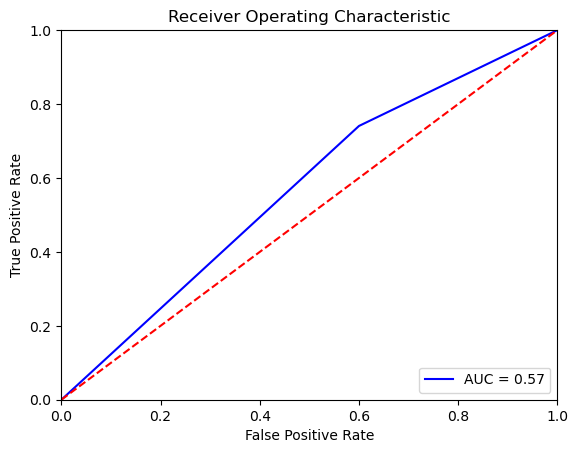

In [38]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
### 결과 시각화

from sklearn.tree import export_graphviz

export_graphviz(model_tree, out_file='result.dot', feature_names=data.columns[0:60], impurity=True, filled=True)

import graphviz

## 생성된 tree.dot 파일을 graphviz가 읽어서 시각화
with open("/content/result.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

In [ ]:
pred = model_rf.predict(X_test)
confusion_matrix(y_test,pred)

In [ ]:
pred_prob = model_rf.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Partial dependence plot
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model_rf, X_test, features=(0,))

In [ ]:
PartialDependenceDisplay.from_estimator(model_rf, X_test, features=(1,))

In [ ]:
PartialDependenceDisplay.from_estimator(model_rf, X_test, features=(59,))

# SVM


In [ ]:
from sklearn.svm import SVC
model_svm = SVC(probability=True)

model_svm.fit(X_train, y_train)

pred = model_svm.predict(X_test)
confusion_matrix(y_test,pred)

In [ ]:
pred_prob = model_svm.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#부스팅(Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()

model_gb.fit(X_train, y_train)

pred = model_gb.predict(X_test)
confusion_matrix(y_test,pred)

In [ ]:
pred_prob = model_gb.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 신경망모형

In [ ]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(max_iter=1000)
model_nn.fit(X_train, y_train)

pred = model_nn.predict(X_test)
confusion_matrix(y_test,pred)

In [ ]:
pred_prob = model_nn.predict_proba(X_test)
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()